# <span style="color:blue"> CAPSTONE PROJECT CASE STUDY </span> 


# Google Data Analytics Professional Certificate








 The following end-to-end project is the capstone project for [Google's Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics).
 
The professional certificate consists of 8 courses structured around the phases of a data analysis project: 

1. Ask
2. Prepare
3. Process
4. Analize
5. Share
6. Act

In the case study the marketing analyst team of a bike-share company has the task of analyzing historical data in order to inform the marketing strategy of the company.

The courses forming part of the certificate use various tools for different phases of the project, introducing the relevant techniques via examples in spreadsheets, SQL, Tableau and R. We expand on this set of tools by bringing into the picture Python together with relevant libraries like NumPy, Pandas and MathplotLib. This approach also has the advantage of allowing the whole process to be executed in one place through the use of a Jupyter Notebook environment.   


## 0. Framework of the problem

<img  src="Cyclistic.png" width="150"  >

*Cyclistic*  is a fictional bike-share company based in Chicago. The company has two different kinds of customers, casual riders,  who purchase single-ride or full-day passes, and Cyclistic members, who purchase annual memberships. The later are more profitable for the company so the marketing analysis team has the task of developing an strategy to convert casual riders into members.


## 1. Ask

The first part of the analysis process consist in formulating the problem in a clear concise way. The formulation of the problem has to take into account the context in which the analysis will be made as well as the key stakeholders who will act upon, and be affected by, the findings of the study. It is essential to identify what is the problem the analysis is trying to solve and formulate this problem in a way that allow us to measure the success of the outcome of the study. The insights provided by our findings will drive business decisions within the company so a solid formulation of the problem is key to the success  of the project.

### Overall goal in which the project is framed: 

*Design marketing strategies aimed at converting casual riders into annual members.*

### Question to be answered by the current analysis:

*How do annual members and casual riders use Cyclistic bikes
diﬀerently?*


## 2. Prepare


In this part of the project we collect the data and address the various issues that will ensure we can use the data in order answer the above question. In particular we need to:

- Collect the data.
- Address licensing, privacy, security, and accessibility of the data.
- Verify the data’s integrity.


### Collecting the data


The data is hosted at Amazon Simple Storage Service and can be accessed via the following URL: 

[https://divvy-tripdata.s3.amazonaws.com/index.html](https://divvy-tripdata.s3.amazonaws.com/index.html)

For our analysis we will use the data from 2022. This data is organized per month with the data of each month corresponding to a .csv file. 

We use the following code to download the data directly from the webpage, unzip the data and store in a local folder that we create for the project. We have broken the script into snippets to better identify each part of the process. 


In [1]:
# Import libraries and modules
import os
import zipfile
import urllib
from zipfile import ZipFile

In [2]:
# Define paths
DOWNLOAD_ROOT = "https://divvy-tripdata.s3.amazonaws.com"
DATA_PATH = "cyclistic_data" 

In [3]:
#An example URL path 
data_url_example = DOWNLOAD_ROOT+"/"+"202201-divvy-tripdata.zip"
data_url_example

'https://divvy-tripdata.s3.amazonaws.com/202201-divvy-tripdata.zip'

In [4]:
# The following function is used to fetch the data
# The input "month_data" is a string containing the local path of each month in the website
# example: "202201-divvy-tripdata.zip"
def fetch_data(month_data, data_path = DATA_PATH):
    data_url = DOWNLOAD_ROOT+"/"+month_data
    os.makedirs(data_path, exist_ok=True) # Creates the directory where the data sets will be stored.
    data_zip_path = os.path.join(data_path, month_data)
    urllib.request.urlretrieve(data_url,data_zip_path)
    data_zipfile = zipfile.ZipFile(data_zip_path)
    data_zipfile.extractall(path=data_path)
    data_zipfile.close

In [5]:
# Now we can use the above function to get the data for the whole year
Months = ["202201","202202","202203","202204","202205","202206","202207","202208","202209","202210","202211","202212"]
for month in Months:
    month_data = month+"-divvy-tripdata.zip"
    fetch_data(month_data)

Lets look a little into the structure of the data by creating dataframes for January and October.

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime

In [7]:
csv_path_202201_tripdata = os.path.join(DATA_PATH,"202201-divvy-tripdata.csv")
df_202201_tripdata = pd.read_csv(csv_path_202201_tripdata)
df_202201_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [8]:
df_202201_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             103770 non-null  object 
 1   rideable_type       103770 non-null  object 
 2   started_at          103770 non-null  object 
 3   ended_at            103770 non-null  object 
 4   start_station_name  87510 non-null   object 
 5   start_station_id    87510 non-null   object 
 6   end_station_name    85843 non-null   object 
 7   end_station_id      85843 non-null   object 
 8   start_lat           103770 non-null  float64
 9   start_lng           103770 non-null  float64
 10  end_lat             103684 non-null  float64
 11  end_lng             103684 non-null  float64
 12  member_casual       103770 non-null  object 
dtypes: float64(4), object(9)
memory usage: 10.3+ MB


In [9]:
csv_path_202210_tripdata = os.path.join(DATA_PATH,"202210-divvy-tripdata.csv")
df_202210_tripdata = pd.read_csv(csv_path_202210_tripdata)
df_202210_tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A50255C1E17942AB,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,13290,Larrabee St & Division St,KA1504000079,41.900680,-87.662600,41.903486,-87.643353,member
1,DB692A70BD2DD4E3,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,13288,Damen Ave & Cullerton St,13089,41.920037,-87.677937,41.854967,-87.675700,casual
2,3C02727AAF60F873,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,655,Western Ave & Leland Ave,TA1307000140,41.979879,-87.681902,41.966400,-87.688704,member
3,47E653FDC2D99236,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,KA1504000133,Orleans St & Chestnut St (NEXT Apts),620,41.902274,-87.627692,41.898203,-87.637536,member
4,8B5407BE535159BF,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,13028,Adler Planetarium,13431,41.874754,-87.649807,41.866095,-87.607267,casual


In [10]:
df_202210_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558685 entries, 0 to 558684
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             558685 non-null  object 
 1   rideable_type       558685 non-null  object 
 2   started_at          558685 non-null  object 
 3   ended_at            558685 non-null  object 
 4   start_station_name  467330 non-null  object 
 5   start_station_id    467330 non-null  object 
 6   end_station_name    462068 non-null  object 
 7   end_station_id      462068 non-null  object 
 8   start_lat           558685 non-null  float64
 9   start_lng           558685 non-null  float64
 10  end_lat             558210 non-null  float64
 11  end_lng             558210 non-null  float64
 12  member_casual       558685 non-null  object 
dtypes: float64(4), object(9)
memory usage: 55.4+ MB


Now we can agregate the data into a single dataframe. As done above we automate the process needed in order to aggregate each month, this is a good practice which gives the advantage of scalability and reproducibility of our code for other projects. 

Before aggregation we notice that all the .csv files have a uniform naming of the form `DATETIME-divvy-tripdata.csv` except the one of September, `202209-divvy-publictripdata.csv`,  so we manually rename this file to `202209-divvy-tripdata.csv` before aggregation. 

In [11]:
dataframe_list = []
for month in Months:
    month_data_csv = month+"-divvy-tripdata.csv"
    csv_path_tripdata = os.path.join(DATA_PATH, month_data_csv)
    df = pd.read_csv(csv_path_tripdata, index_col=None, header=0)
    dataframe_list.append(df)



In [12]:
cyclistic_data_frame = pd.concat(dataframe_list, axis=0, ignore_index=True)

Now the data for the whole year is contained in the dataframe `cyclistic_data_frame`.

In [13]:
# First n rows of the dataframe
n = 10
cyclistic_data_frame.head(n)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member
8,154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.861251,-87.656500,41.883380,-87.641170,member
9,72DC25B2DD467EEF,classic_bike,2022-01-28 15:27:53,2022-01-28 15:35:16,LaSalle St & Jackson Blvd,TA1309000004,Clinton St & Washington Blvd,WL-012,41.878166,-87.631929,41.883380,-87.641170,member


In [14]:
# Metadata of the dataframe
cyclistic_data_frame.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             5667717 non-null  object 
 1   rideable_type       5667717 non-null  object 
 2   started_at          5667717 non-null  object 
 3   ended_at            5667717 non-null  object 
 4   start_station_name  4834653 non-null  object 
 5   start_station_id    4834653 non-null  object 
 6   end_station_name    4774975 non-null  object 
 7   end_station_id      4774975 non-null  object 
 8   start_lat           5667717 non-null  float64
 9   start_lng           5667717 non-null  float64
 10  end_lat             5661859 non-null  float64
 11  end_lng             5661859 non-null  float64
 12  member_casual       5667717 non-null  object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


### About our data

The data has been dowloaded from [divvy-tripdata](https://divvy-tripdata.s3.amazonaws.com/index.html) and its ussage falls within the data license agreement descrived [here](https://ride.divvybikes.com/data-license-agreement).

We have aggregated the data into a single data frame. In the process we also created a folder where the .csv files with the data of each month are stored. 

A first look at the information from the data frame reveals that there are values missing in certain fields. Also some of the fields (e.g. those containing dates) should be formatted so that we can work with these. Finally, it is desirable to include new fields (e.g. duration of each trip).

## 3. Process

In the third stage of our project we will process the data. Our goal is to ensure  the data is clean and transform it so that we can effectively work with it. In the process we will learn more about our dataset. 

### Dealing with missing values

One of the initial tasks in any data cleaning process consists in identifying and dealing with missing values in the data. In our case by applying the `info` method to the dataframe we can identify which columns have missing values, these are:`start_station_name`, `start_station_id`, `end_station_name`, `end_station_id`, `start_lat`, `start_lng`,  `end_lat` and `end_lng`. From these the first four have the most missing values, these values refer to the names and id's of the stations and will not be used in the analysis so we can drop the columns altogether. As for the other columns with missing values these contain the coordinates, longitude and latitude, of the starting and end stations of each trip. This is valuable information. Since the number of records for which the information is missing is small relative to the size of the dataset we can deal with the missing values by dropping the corresponding rows in the dataframe.  

In [15]:
# Drop columns with missing values
cyclistic_data_frame.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], axis=1, inplace=True)

In [16]:
# Drop rows with missing values 
cyclistic_data_frame.dropna(axis=0, inplace=True)

In [17]:
cyclistic_data_frame.reset_index(drop=True)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...
5661854,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,41.883165,-87.651100,41.877642,-87.649618,member
5661855,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,41.949980,-87.714019,41.943403,-87.679618,member
5661856,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,41.883143,-87.637242,41.881859,-87.649264,member
5661857,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,41.883165,-87.651100,41.877642,-87.649618,member


In [18]:
cyclistic_data_frame.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5661859 entries, 0 to 5667716
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ride_id        5661859 non-null  object 
 1   rideable_type  5661859 non-null  object 
 2   started_at     5661859 non-null  object 
 3   ended_at       5661859 non-null  object 
 4   start_lat      5661859 non-null  float64
 5   start_lng      5661859 non-null  float64
 6   end_lat        5661859 non-null  float64
 7   end_lng        5661859 non-null  float64
 8   member_casual  5661859 non-null  object 
dtypes: float64(4), object(5)
memory usage: 432.0+ MB


The new datframe has no missing values and only contains information pertienent for our analysis. 

### Checking and formatting data types

Another common data cleaning task consist on converting the data to the appropriate type. In our case the columns `started_at` and `ended_at`, containing the information on the date and time of the start/end of each trip, are formatted as strings. For manipulation we will change their format to **datetime** format.  

In [19]:
cyclistic_data_frame[['started_at']] = cyclistic_data_frame[['started_at']].apply(pd.to_datetime)
cyclistic_data_frame[['ended_at']] = cyclistic_data_frame[['ended_at']].apply(pd.to_datetime)

In [20]:
# We can now check the new data types
cyclistic_data_frame.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5661859 entries, 0 to 5667716
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   ride_id        5661859 non-null  object        
 1   rideable_type  5661859 non-null  object        
 2   started_at     5661859 non-null  datetime64[ns]
 3   ended_at       5661859 non-null  datetime64[ns]
 4   start_lat      5661859 non-null  float64       
 5   start_lng      5661859 non-null  float64       
 6   end_lat        5661859 non-null  float64       
 7   end_lng        5661859 non-null  float64       
 8   member_casual  5661859 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 432.0+ MB


### Defining new features

In order to carry our analysis it is desirable to add to our dataframe columns corresponding to the duration of each trip and the distance between the starting station and end station. We can compute these directly from our dataframe. 

**trip_duration**

We compute the trip duration as the difference between the `starting_at` and `ending_at` fields. The result is then converted to seconds and included in a new column `trip_duration`.

In [21]:
cyclistic_data_frame['trip_duration'] = cyclistic_data_frame['ended_at'] - cyclistic_data_frame['started_at']
cyclistic_data_frame['trip_duration'] = cyclistic_data_frame['trip_duration'].dt.total_seconds()

**dist_btw_stations** 

We compute the distance between the starting station and the end station of each trip using the values for their latitude and longitude. These are geographical coordinates and we use them to compute the geodesic distance between the stations. We assign the distance measured in kilometers to a new column  `dist_btw_stations`.

It is important to note that the distance between the stations where each trip begins and ends does no necessarily reflect the distance traveled by a user. In particular, if a bike is returned to the same station where it was picked up this distance will be zero independently of the distance traveled by the user. 

In [22]:
!pip install geopy

In [23]:
from geopy.distance import geodesic

In [24]:
print(geodesic((42.012800, -87.665906), (42.012560, -87.674367)).km)

0.7013678945000444


In [25]:
# First we create a list with the distances
n= len(cyclistic_data_frame.index) 
dist_list=[]
for i in range(n):
    distance = geodesic((cyclistic_data_frame.iloc[i]['start_lat'], cyclistic_data_frame.iloc[i]['start_lng']),(cyclistic_data_frame.iloc[i]['end_lat'], cyclistic_data_frame.iloc[i]['end_lng'])).km
    dist_list.append(distance)

In [26]:
cyclistic_data_frame['dist_btw_stations'] = dist_list

## Final data frame

We have transformed our dataset into a data frame which conforms to the needs of the project. This is a good moment to save a copy of it both for back up purposes and as an entry point into our change-log. We also show the metadata of the dataframe usinfg the `info` method and its first rows using `head`. 



In [27]:
cyclistic_data_frame_copy = cyclistic_data_frame

In [28]:
cyclistic_data_frame_copy.to_csv('cyclistic_csv_data.csv',  index = True)

In [29]:
cyclistic_data_frame.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5661859 entries, 0 to 5667716
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   ride_id            5661859 non-null  object        
 1   rideable_type      5661859 non-null  object        
 2   started_at         5661859 non-null  datetime64[ns]
 3   ended_at           5661859 non-null  datetime64[ns]
 4   start_lat          5661859 non-null  float64       
 5   start_lng          5661859 non-null  float64       
 6   end_lat            5661859 non-null  float64       
 7   end_lng            5661859 non-null  float64       
 8   member_casual      5661859 non-null  object        
 9   trip_duration      5661859 non-null  float64       
 10  dist_btw_stations  5661859 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(3)
memory usage: 518.4+ MB


In [30]:
cyclistic_data_frame.head(10)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,dist_btw_stations
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,42.012800,-87.665906,42.012560,-87.674367,casual,177.0,0.701379
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,42.012763,-87.665967,42.012560,-87.674367,casual,261.0,0.696141
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,41.925602,-87.653708,41.925330,-87.665800,member,261.0,1.003451
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,41.983593,-87.669154,41.961507,-87.671387,casual,896.0,2.460125
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,41.877850,-87.624080,41.884621,-87.627834,member,362.0,0.814073
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,41.895634,-87.672069,41.903119,-87.673935,member,202.0,0.845666
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,41.954341,-87.686080,41.952833,-87.649993,member,994.0,2.996660
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,41.925602,-87.653708,41.931931,-87.677856,member,724.0,2.122693
8,154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,41.861251,-87.656500,41.883380,-87.641170,member,1527.0,2.767790
9,72DC25B2DD467EEF,classic_bike,2022-01-28 15:27:53,2022-01-28 15:35:16,41.878166,-87.631929,41.883380,-87.641170,member,443.0,0.961120


## 4. Analyze

Having cleaned and process our data now we are prepared for its analysis. Throughout we keep the questions from the *Ask*  phase as guidelines for the analysis we will carry out. 


In [7]:
cyclistic_data=pd.read_csv('cyclistic_csv_data.csv', index_col = 0)

### Plots, statistics and correlations

As part of our analysis we will look at various plots which summarize the information of a given variable and the relationships between various variables. We are particularly interest in the relationship between user type (casual vs member) to other variables. The plots obtained in this section also provide essential material for the *Share* part of the project. We begin by loading the required libraries. 


In [8]:
#Libraries and modules 

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

### Categorical features


Lets start by exploring the categorical variables in our dataset. These are 

`rideable_type`

and 

`member_casual`

### rideable_type
The variable `rideable_type` gives the type of bike used for an specific trip. Following are its possible values together with their respective value counts.


In [9]:
cyclistic_data['rideable_type'].value_counts()

electric_bike    2889029
classic_bike     2597972
docked_bike       174858
Name: rideable_type, dtype: int64

### member_casual
The variable `member_casual` is our target value as it contains the information about which kind of user our trips refer to.  


In [10]:
cyclistic_data['member_casual'].value_counts()

member    3344996
casual    2316863
Name: member_casual, dtype: int64

Now we can look back at the rideable type counts corresponding to each type of user. 

/home/jorge/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


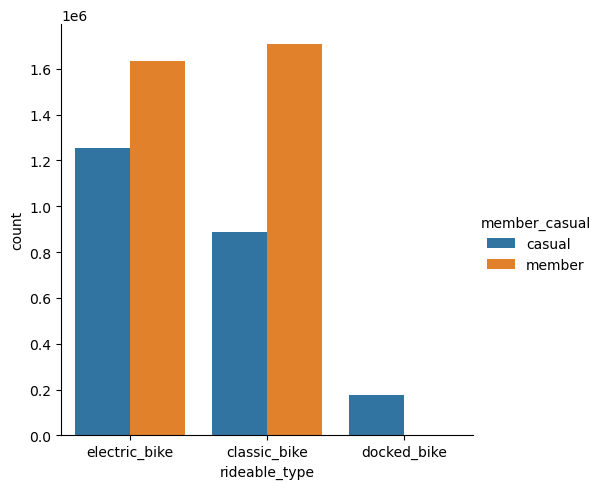

In [11]:
sns.catplot("rideable_type", hue="member_casual", data=cyclistic_data, kind="count")

### Numerical features

Centrality and distribution measures for each one of the numerical features can be obtained using the `describe` method. Afterwards we look at the statistics for trip duration and distance between stations for each user category and plot the corresponding distribution graphs. 


In [12]:
cyclistic_data.describe()

,start_lat,start_lng,end_lat,end_lng,trip_duration,dist_btw_stations
count,5.661859e+06,5.661859e+06,5.661859e+06,5.661859e+06,5.661859e+06,5.661859e+06
mean,4.190224e+01,-8.764783e+01,4.190242e+01,-8.764790e+01,9.796526e+02,2.139987e+00
std,4.622594e-02,2.998860e-02,6.805821e-02,1.082985e-01,2.614010e+03,1.183401e+01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01,-6.212010e+05,0.000000e+00
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01,3.490000e+02,8.731916e-01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,6.160000e+02,1.575242e+00
75%,4.193000e+01,-8.762959e+01,4.193000e+01,-8.762963e+01,1.105000e+03,2.780516e+00
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00,2.061244e+06,9.817319e+03


### Trip Duration Statistics

In [13]:
cyclistic_data.groupby(['member_casual'])['trip_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2316863.0,1319.154058,3788.856100,-8245.0,440.0,778.0,1439.0,2061244.0
member,3344996.0,744.501860,1219.692232,-621201.0,307.0,530.0,916.0,89996.0


Looking at the statistics we observe the presence of outliers and negative values. These are probably due to corrupted entries in the database. Because of the high concentration of values we apply a shifted logarithm to the data prior to plotting the distribution in order to have a better visualization of the main trends.   

In [14]:
def shifted_log(t):
    return np.log(1 + t)

In [15]:
cyclistic_data['log_duration'] = cyclistic_data['trip_duration'].apply(shifted_log) 

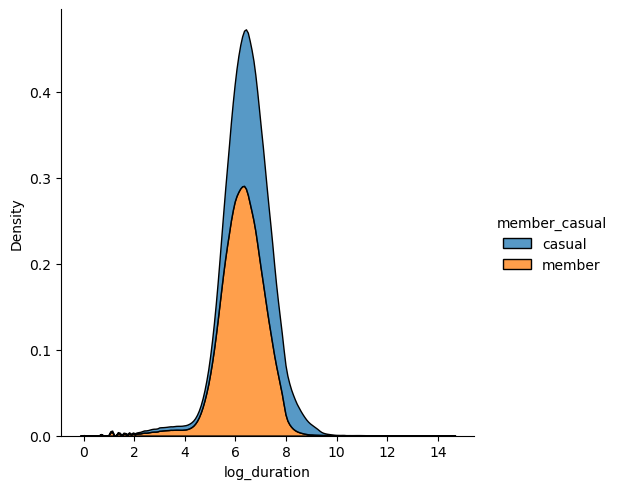

In [16]:
sns.displot(data=cyclistic_data, x='log_duration', hue= 'member_casual', multiple="stack", kind="kde")

### Distance Statistics

In [17]:
cyclistic_data.groupby(['member_casual'])['dist_btw_stations'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2316863.0,2.18165,9.363813,0.0,0.915379,1.658312,2.855152,9817.319464
member,3344996.0,2.11113,13.278177,0.0,0.858706,1.509883,2.733323,9816.616946


In [18]:
cyclistic_data['log_dist'] = cyclistic_data['dist_btw_stations'].apply(shifted_log) 

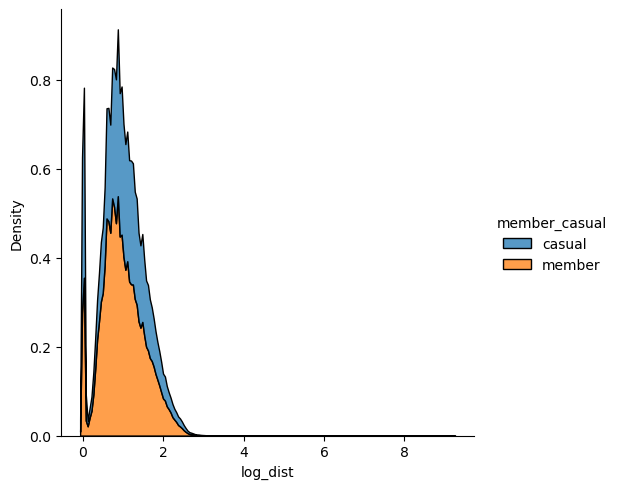

In [19]:
sns.displot(data=cyclistic_data, x='log_dist', hue= 'member_casual', multiple="stack", kind="kde")


## 5. Share

Having analyzed our data we can now communicate to our findings to various stakeholders. Returning to our original question 

*How do annual members and casual riders use Cyclistic bikes
diﬀerently?*

As a result of our analysis we see that the main difference is that shorter trips, both in terms of duration and distance between stations, are more common among annual members. Annual members and casual riders also differ in that annual members have an almost equal usage of electric and nonelectric bikes whilst casual members use more electric ones. Finally annual members use more often the bikes accounting for about two thirds of the total trips. 

These findings can be shared via visualizations based in the above graphs or in the form of dashboards. Depending on which group of stakeholders we are addressing we can use different ways of presenting our findings. 


## 6. Act

The overall goal in which the project is framed was to design marketing strategies aimed at converting casual riders into annual members. Our findings can be implemented in a marketing strategy that targets casual riders by highlighting the convenience of being able to use Cyclistic bikes for short and spontaneous trips. 